In [1]:
import os
import argparse
import logging
import nni
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import re

In [3]:
from torchsummary import summary

import matplotlib.pyplot as plt

In [4]:
from dataset import *
from models import *

In [5]:
TEST_STEP = 5

testset  = IMPAXDataset('/shares/Public/IMPAX/test')

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=TEST_STEP,
    shuffle=True, 
    num_workers=6)

In [6]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Using device: cuda

GeForce RTX 2080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [7]:
PATH = '/home/xfr/nni/model-5-64/TwNuKtj7/best_zdoyO.pth'

m = re.search('model-(\d*)-(\d*)', PATH)

hidden_layer = int(m[1])
hidden_size  = int(m[2])

model = Net(hidden_layer, hidden_size)
model.load_state_dict(torch.load(PATH))
model.to(device)
model.eval()

summary(model, (1,256,256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]             640
            Conv2d-2         [-1, 64, 256, 256]          36,928
            Conv2d-3         [-1, 64, 256, 256]          36,928
            Conv2d-4         [-1, 64, 256, 256]          36,928
            Conv2d-5         [-1, 64, 256, 256]          36,928
            Conv2d-6         [-1, 64, 256, 256]          36,928
            Conv2d-7          [-1, 2, 256, 256]           1,154
Total params: 186,434
Trainable params: 186,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.25
Forward/backward pass size (MB): 193.00
Params size (MB): 0.71
Estimated Total Size (MB): 193.96
----------------------------------------------------------------


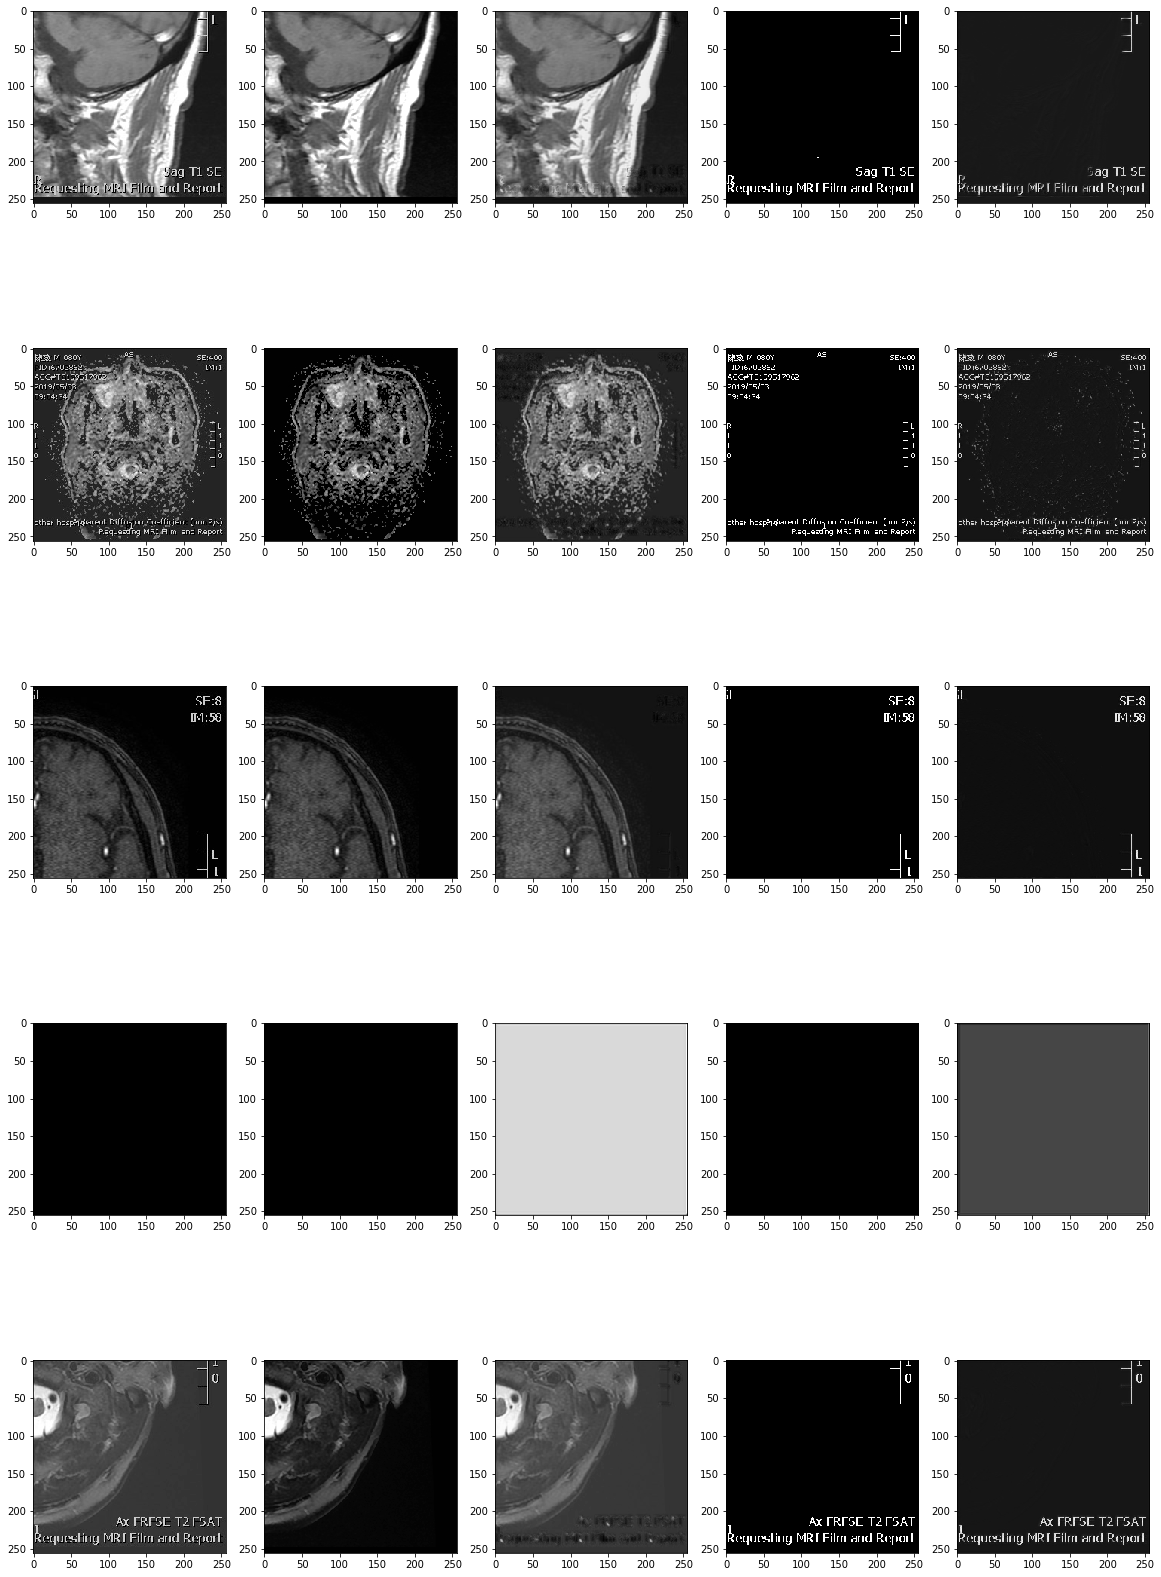

In [11]:
plt.rcParams['figure.figsize'] = [20, 30]

dataiter = iter(testloader)
# dataiter = iter(trainloader)
images, labels = dataiter.next()

with torch.no_grad():
    output = model(images.to(device))

# torch.set_printoptions(profile="full")
# print(labels[0])
# torch.set_printoptions(profile="default")

for j in range(TEST_STEP):
    out = output[j]
    plt.subplot(TEST_STEP,5,j*5+1)
    plt.imshow(images[j][0,:,:], cmap='gray')
    
    plt.subplot(TEST_STEP,5,j*5+2)
    plt.imshow(labels[j][0,:,:], cmap='gray')
    plt.subplot(TEST_STEP,5,j*5+3)
    plt.imshow(out[0,:,:].cpu().detach().numpy(), cmap='gray')
    
    plt.subplot(TEST_STEP,5,j*5+4)
    plt.imshow(labels[j][1,:,:], cmap='gray')
    plt.subplot(TEST_STEP,5,j*5+5)
    plt.imshow(out[1,:,:].cpu().detach().numpy(), cmap='gray')
    
plt.show()
